<a href="https://colab.research.google.com/github/everestso/Fall19/blob/master/c174f19tree4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import sys
import os
import pprint

In [0]:
RED = 1
BLACK = 0
class Node:
  def __init__(self, key):
    self.p=None;
    self.key = key
    self.left = None
    self.right = None
  def __str__(self):
    out={}
    out["color"]="red" if self.color==RED else "black"
    out["key"] = self.key
    out["p"]=self.p.key
    out["left"]=self.left.key
    out["right"]=self.right.key
    return str(out)
  
class Tree:
  def __init__(self):
    self.nil = Node(-1)
    self.nil.color = BLACK
    self.root = self.nil


In [0]:
def GNode(G, x):
  if x.color == RED:
    G.node(str(x.key), color='red', style='filled', fontcolor='white')
  else:
    G.node(str(x.key), color='black', style='filled', fontcolor='white')
    
def DisplayTreeWalk(G, T, x):
  if x!=T.nil:
    if x.left != T.nil:
      GNode(G, x.left)
      G.edge(str(x.key),str(x.left.key), label = '', color='blue')
      DisplayTreeWalk(G, T, x.left)
    else:
      G.nilCount += 1
      # G.node(str(-1*G.nilCount), label = "nil", color='black', fontcolor='black', penwidth="1", size="2")
      G.node(str(-1*G.nilCount), shape="point")
      G.edge(str(x.key),str(-1*G.nilCount), label = '', color='blue')
   
    if x.right != T.nil:
      GNode(G, x.right)
      G.edge(str(x.key),str(x.right.key), label = '', color='red')
      DisplayTreeWalk(G, T, x.right)
    else:
      G.nilCount += 1
      # G.node(str(-1*G.nilCount), label = "nil", color='black', fontcolor='black', penwidth="1", size="2")
      G.node(str(-1*G.nilCount), shape="point")
      G.edge(str(x.key),str(-1*G.nilCount), label = '', color='red')
    
def DisplayTree(T, size=(15,15)):
    'Plots a tree'
    G = gv.Graph(filename='graph', format='png')
    G.nilCount = 0
    GNode(G, T.root)
    DisplayTreeWalk(G, T, T.root)
    
    G.render()
    img=mpimg.imread('graph.png')

    fig, ax = plt.subplots(frameon=False)
    fig.set_size_inches(size)
    imgplot = plt.imshow(img)

    ax.axis('off')
    plt.box(on=None) 
    plt.show()  

In [0]:
def LeftRotate(T, x):
  y = x.right       # set y
  x.right = y.left  # turn y’s left subtree into x’s right subtree
  if y.left != T.nil:
    y.left.p = x
  y.p = x.p         # link x’s parent to y
  if x.p == T.nil:
    T.root = y
  elif x == x.p.left:
    x.p.left = y
  else:
    x.p.right = y
  y.left = x
  x.p = y
  
def RightRotate(T, x):
  y = x.left       # set y
  x.left = y.right  # turn y’s right subtree into x’s left subtree
  if y.right != T.nil:
    y.right.p = x
  y.p = x.p         # link x’s parent to y
  if x.p == T.nil:
    T.root = y
  elif x == x.p.left:
    x.p.left = y
  else:
    x.p.right = y
  y.right = x
  x.p = y

In [0]:

def RBInsertFixup(T, z):
  while z.p.color==RED:
    if z.p==z.p.p.left:
      y = z.p.p.right
      if y.color==RED:
        z.p.color = BLACK    ## case 1
        y.color = BLACK      ## case 1
        z.p.p.color = RED    ## case 1
        z=z.p.p              ## case 1
      else:
        if z==z.p.right:
          z = z.p              ## case 2
          LeftRotate(T, z)     ## case 2
        z.p.color = BLACK      ## case 3
        z.p.p.color = RED      ## case 3
        RightRotate(T, z.p.p)  ## case 3 
    
    else:                      ## (same as then clausewith “right” and “left” exchanged)
      y = z.p.p.left
      if y.color==RED:
        z.p.color = BLACK    ## case 1
        y.color = BLACK      ## case 1
        z.p.p.color = RED    ## case 1
        z=z.p.p              ## case 1
      else:
        if z==z.p.left:
          z = z.p              ## case 2
          RightRotate(T, z)     ## case 2
        z.p.color = BLACK      ## case 3
        z.p.p.color = RED      ## case 3
        LeftRotate(T, z.p.p)  ## case 3 
  T.root.color = BLACK
    
def RBTreeInsert(T, z, fix=True):
  y=T.nil
  x=T.root
  while (x != T.nil):
    y = x
    if z.key < x.key:
      x = x.left
    else:
      x = x.right
  z.p = y
  if y==T.nil:
    T.root = z
  elif z.key < y.key:
    y.left = z
  else:
    y.right = z
  z.left = T.nil
  z.right = T.nil
  z.color = RED
  if fix:
    RBInsertFixup(T, z)
    
def InorderTreeWalk(T, x):
  if x!=T.nil:
    InorderTreeWalk(T, x.left)
    print (x.key, end=" " )
    InorderTreeWalk(T, x.right)

[2, 1, 6, 4, 8, 5, 9, 3, 7, 0]
0 1 2 3 4 5 6 7 8 9 

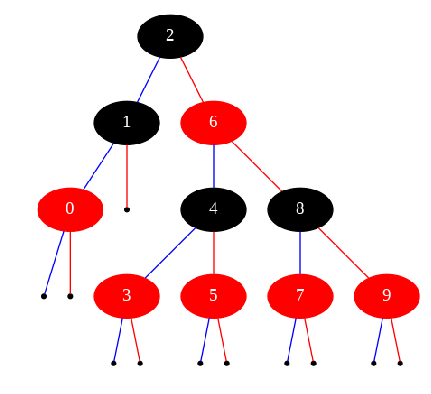

In [63]:
T = Tree()

data = list(range(10))
random.shuffle(data)
print(data)

for i in data:
  z = Node(i)
  RBTreeInsert(T,z)

InorderTreeWalk(T, T.root)
DisplayTree(T, (7,7))

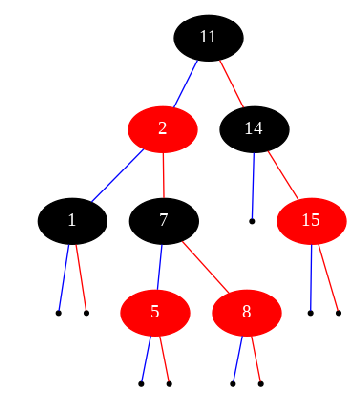

In [64]:
data = [11, 2, 14, 1, 7, 5, 8, 15]
T = Tree()

for i in data:
  z = Node(i)
  RBTreeInsert(T,z)
DisplayTree(T, (7,7))

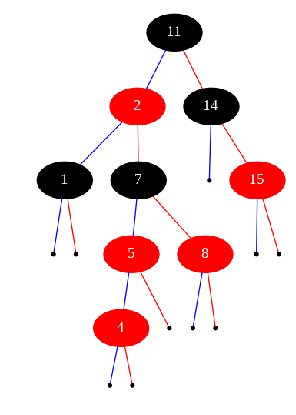

In [65]:
z = Node(4)
RBTreeInsert(T, z, False)
DisplayTree(T, (7,7))

In [66]:
### Case 1
### z's uncle is red

y = z.p.p.right
print (y)

{'color': 'red', 'key': 8, 'p': 7, 'left': -1, 'right': -1}


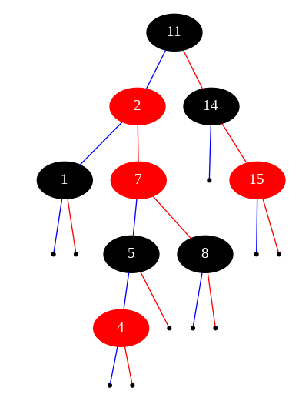

In [67]:
## Case 1
z.p.color =BLACK
y.color = BLACK
z.p.p.color = RED

z = z.p.p
DisplayTree(T, (7,7))

In [68]:
### Case 
### z's uncle is black

y = z.p.p.right
print ("z is: ", z)
print ("y is: ", y)

z is:  {'color': 'red', 'key': 7, 'p': 2, 'left': 5, 'right': 8}
y is:  {'color': 'black', 'key': 14, 'p': 11, 'left': -1, 'right': 15}
